# Movie Dataset Analysis and Recommendation System

## Introduction
This project involves analyzing a movie dataset to uncover interesting patterns and insights related to genres, actors, movies, and themes. The dataset comprises approximately 1 million movies and is structured across four CSV files, detailing different aspects of each movie.

As an extreme movie enthusiast, I'm always looking for new movies to watch. This project aims to find interesting insights that will help discover new movies and develop a basic recommendation system.

## Objectives
- Analyze and explore the data to discover patterns and trends within the movie industry.
- Develop a basic recommendation system based on the insights gathered from the analysis.

## Dataset
The dataset is sourced from [Kaggle](https://www.kaggle.com/datasets/gsimonx37/letterboxd/data) and includes:
1. **Genres** - Categorization of movies by genre.
2. **Actors** - Information about the cast in each movie.
3. **Movies** - Details about individual movies.
4. **Themes** - Various themes associated with each movie.

Let's start by importing the necessary libraries and loading the data.


todo: 
- 3-5 questions about the data that you will answer
- assessment data quality (data types, missing values, duplicates, etc.)
- 5-10 plots
- a caption for each plot
- descriptive statistics
- use groupby for some analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
genres_df = pd.read_csv('movie_dataset/genres.csv')
actors_df = pd.read_csv('movie_dataset/actors.csv')
movies_df = pd.read_csv('movie_dataset/movies.csv')
themes_df = pd.read_csv('movie_dataset/themes.csv')

print(f"Genres dataset shape: {genres_df.shape}")
print(f"Actors dataset shape: {actors_df.shape}")
print(f"Movies dataset shape: {movies_df.shape}")
print(f"Themes dataset shape: {themes_df.shape}")

Genres dataset shape: (1046849, 2)
Actors dataset shape: (5798450, 3)
Movies dataset shape: (941597, 7)
Themes dataset shape: (125641, 2)


## Genres Analysis

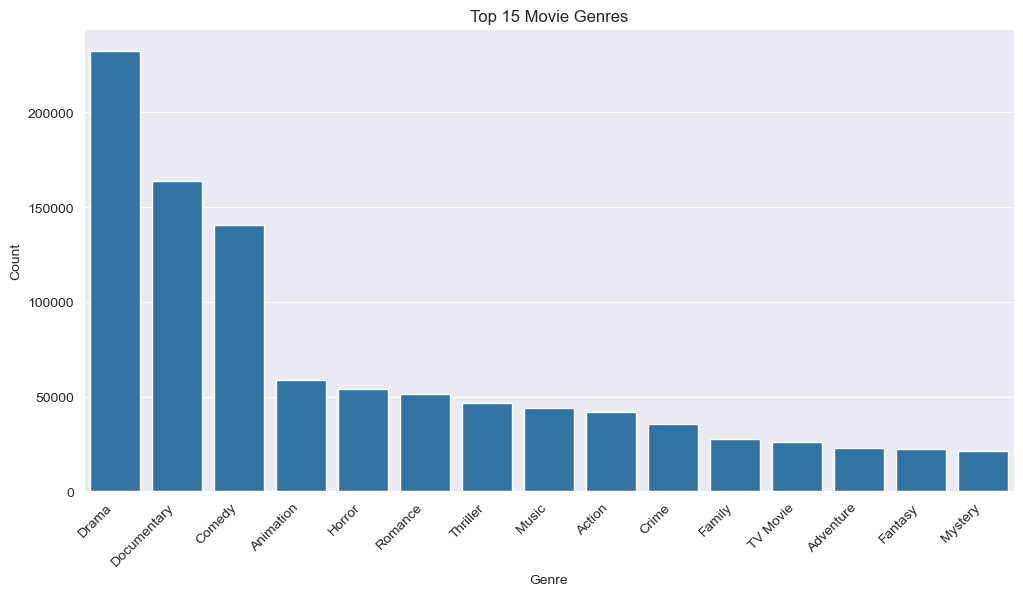

Total number of unique genres: 19
Top 5 genres: Drama, Documentary, Comedy, Animation, Horror


In [24]:
genre_counts = genres_df["genre"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index[:15], y=genre_counts.values[:15])
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 15 Movie Genres")
plt.xticks(rotation=45, ha='right')
plt.show()

print(f"Total number of unique genres: {len(genre_counts)}")
print(f"Top 5 genres: {', '.join(genre_counts.index[:5])}")

## Actors Analysis

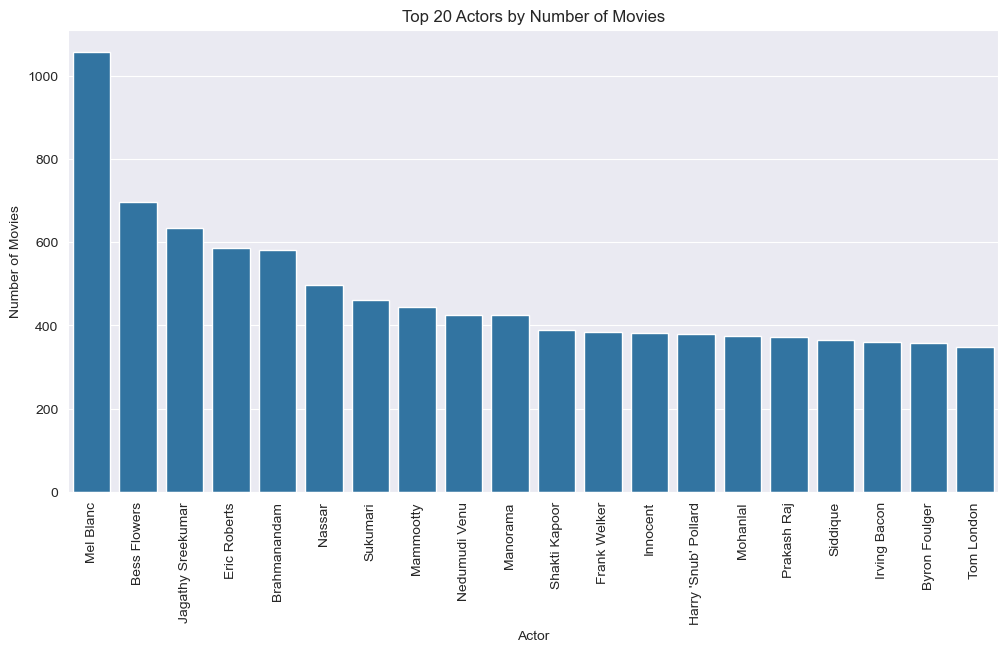

Total number of unique actors: 1600662
Top 5 actors: Mel Blanc, Bess Flowers, Jagathy Sreekumar, Eric Roberts, Brahmanandam
Fun fact: Mel Blanc, was a renowned American voice actor celebrated of Bugs Bunny, Daffy Duck, Porky Pig, and many many more.


In [25]:
actor_counts = actors_df["name"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=actor_counts.index[:20], y=actor_counts.values[:20])
plt.xlabel("Actor")
plt.ylabel("Number of Movies")
plt.title("Top 20 Actors by Number of Movies")
plt.xticks(rotation=90)
plt.show()

print(f"Total number of unique actors: {len(actor_counts)}")
print(f"Top 5 actors: {', '.join(actor_counts.index[:5])}")
print("Fun fact: Mel Blanc, was a renowned American voice actor celebrated of Bugs Bunny, Daffy Duck, Porky Pig, and many many more.")

## Movies Analysis

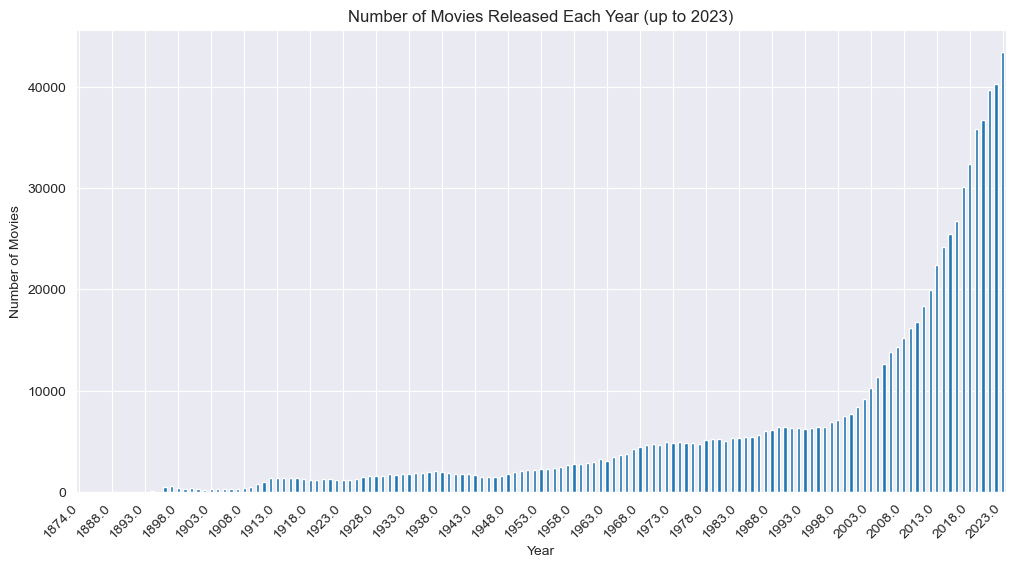

Total number of movies: 941597


In [28]:
# Plot number of movies released each year
year_counts = movies_df[movies_df['date'] <= 2023]['date'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Released Each Year (up to 2023)")

plt.xticks(ticks=range(0, len(year_counts), 5), labels=year_counts.index[::5], rotation=45, ha="right")
plt.show()

print(f"Total number of movies: {len(movies_df)}")

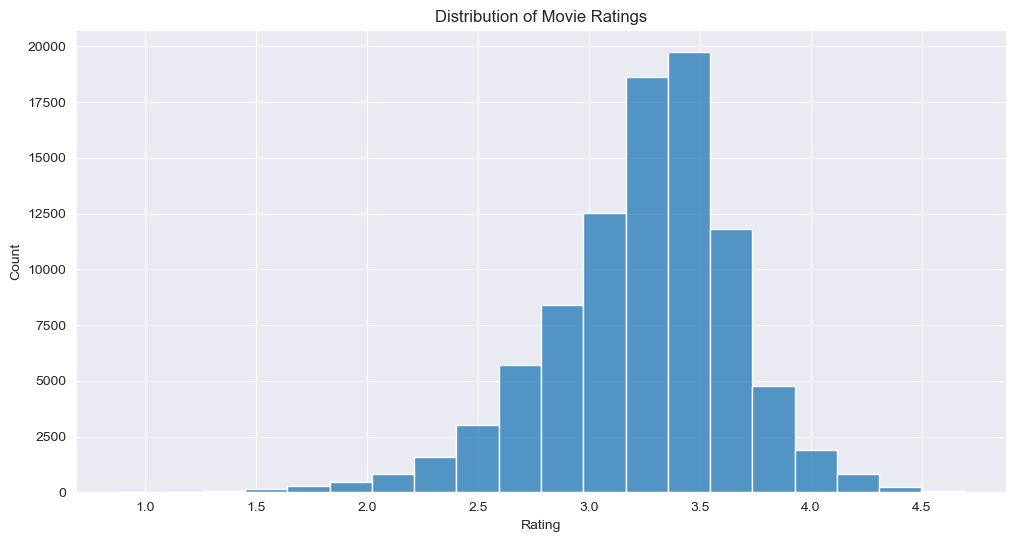

Average movie rating: 3.24
Median movie rating: 3.30


In [27]:
# Plot rating distribution
plt.figure(figsize=(12, 6))
sns.histplot(movies_df['rating'], bins=20)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()


print(f"Average movie rating: {movies_df['rating'].mean():.2f}")
print(f"Median movie rating: {movies_df['rating'].median():.2f}")

## Themes Analysis

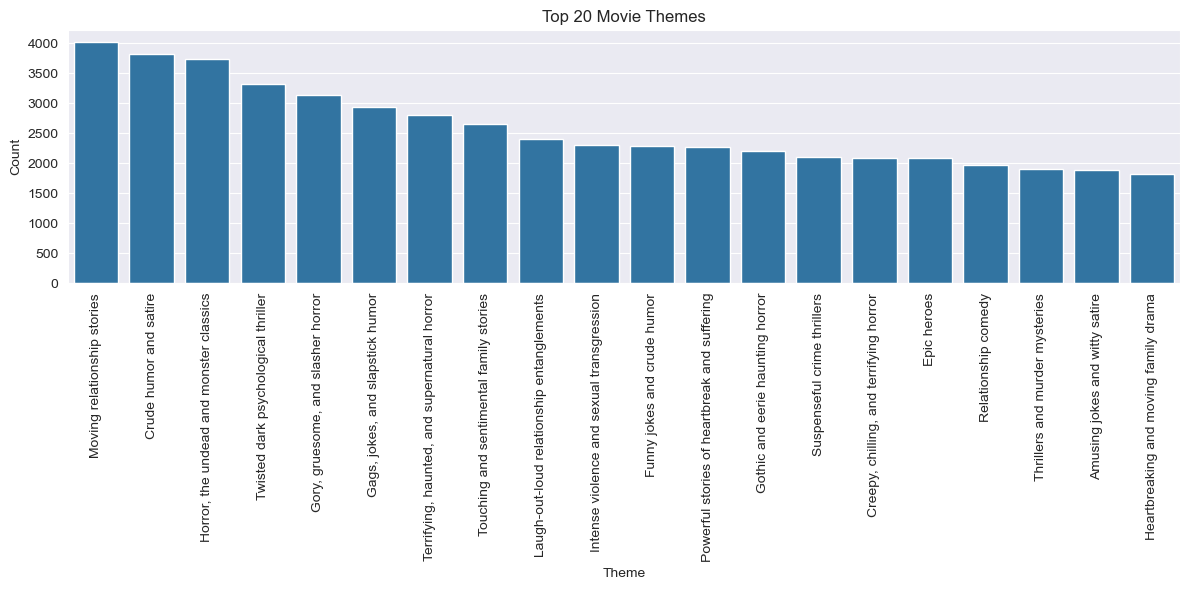

Total number of unique themes: 109
Top 5 themes: Moving relationship stories, Crude humor and satire, Horror, the undead and monster classics, Twisted dark psychological thriller, Gory, gruesome, and slasher horror


In [18]:
theme_counts = themes_df["theme"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=theme_counts.index[:20], y=theme_counts.values[:20])
plt.xlabel("Theme")
plt.ylabel("Count")
plt.title("Top 20 Movie Themes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(f"Total number of unique themes: {len(theme_counts)}")
print(f"Top 5 themes: {', '.join(theme_counts.index[:5])}")

## Correlation Analysis

In [ ]:
# Merge datasets
merged_df = movies_df.merge(genres_df, on='id')
merged_df = merged_df.merge(actors_df, on='id')
merged_df = merged_df.merge(themes_df, on='id')

# Calculate average rating for each genre
genre_ratings = merged_df.groupby('genre')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_ratings.index[:15], y=genre_ratings.values[:15])
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Rating by Genre (Top 15)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Genre with highest average rating: {genre_ratings.index[0]} ({genre_ratings.values[0]:.2f})")
print(f"Genre with lowest average rating: {genre_ratings.index[-1]} ({genre_ratings.values[-1]:.2f})")

## Basic Recommendation System

Let's create a simple content-based recommendation system using movie genres, actors, and themes.

In [ ]:
def get_recommendations(title, cosine_sim, indices, df):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

# Combine relevant features
merged_df['combined_features'] = merged_df['genre'] + ' ' + merged_df['name'] + ' ' + merged_df['theme']

# Create CountVectorizer
cv = CountVectorizer(stop_words='english')
count_matrix = cv.fit_transform(merged_df['combined_features'])

# Compute cosine similarity
cosine_sim = cosine_similarity(count_matrix)

# Create a reverse map of indices and movie titles
indices = pd.Series(merged_df.index, index=merged_df['title']).drop_duplicates()

# Get recommendations for a sample movie
sample_movie = merged_df['title'].iloc[0]
recommendations = get_recommendations(sample_movie, cosine_sim, indices, merged_df)

print(f"Recommendations for '{sample_movie}':")
print(recommendations)

## Conclusion

This analysis provides insights into the movie dataset, including popular genres, actors, themes, and trends in movie releases and ratings. The basic recommendation system demonstrates how we can use content-based filtering to suggest similar movies based on genres, actors, and themes.

Future improvements could include:
1. Incorporating user ratings for a collaborative filtering approach
2. Analyzing the relationship between movie budget and ratings
3. Exploring seasonal trends in movie releases
4. Implementing a more sophisticated recommendation algorithm, such as matrix factorization